In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank Customer Churn Prediction.csv')
#df.dtypes
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)

df = df.drop(['customer_id'], axis='columns')
X = df.drop(['churn'], axis='columns')
y = pd.get_dummies(df['churn'], prefix='churn')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
y

,churn_0,churn_1
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
9995,True,False
9996,True,False
9997,False,True
9998,False,True


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input


model = Sequential([
Input(shape=(X_train.shape[1],)),
Dense(100, activation="relu"),
Dense(2, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,602 (6.26 KB)

 Trainable params: 1,602 (6.26 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5128 - val_loss: 0.4567
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.4480 - val_loss: 0.4401
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.4356 - val_loss: 0.4268
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.4270 - val_loss: 0.4189
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.4110 - val_loss: 0.4063
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 0.4011 - val_loss: 0.3946
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.3800 - val_loss: 0.3836
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.3692 - val_loss: 0.3792
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.3666 - val_loss: 0.3714
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.3500 - val_loss: 0.3690
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.3552 - val_loss: 0.3643
Epoch 12/100
200/200 

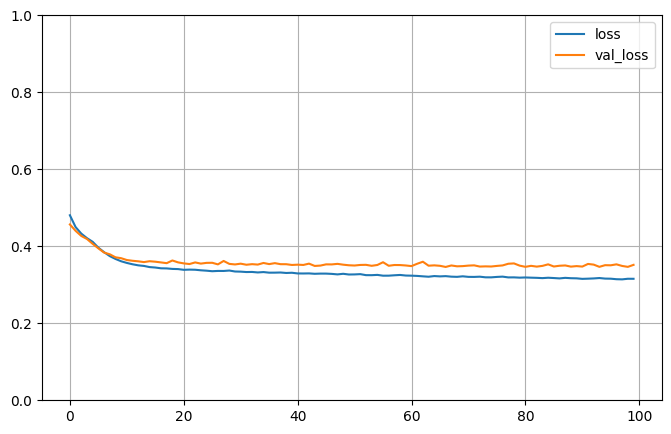

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(p) for p in y_pred]



print(confusion_matrix(y_test['churn_1'], y_pred))
print(classification_report(y_test['churn_1'], y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
[[1542   43]
 [ 220  195]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      1585
        True       0.82      0.47      0.60       415

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000

